# Entrega 4

## Indice

* <a href="#Practica-7---Estimadores">Práctica 7 - Estimadores</a>
    * <a href="#Método-de-los-momentos">Método de los momentos</a>
    * <a href="#Método-de-máxima-verosimilitud">Método de máxima verosimilitud</a>
    * <a href="#Estimadores-de-distribuciones-conocidas">Estimadores de distribuciones conocidas</a>
    * <a href="#Propiedades-de-los-estimadores">Propiedades de los estimadores</a>
        * <a href="#Insesgadez">Insesgadez</a>
        * <a href="#Consistencia">Consistencia</a>
        * <a href="#Error-cuadrático-medio">Error cuadrático medio</a>
* <a href="#Práctica-8---Intervalos-de-confianza">Práctica 8 - Intervalos de confianza</a>
    * <a href="#Intervalos-de-confianza-exactos">Intervalos de confianza exactos</a>
    * <a href="#Intervalos-de-confianza-asintóticos">Intervalos de confianza asintóticos</a>
* <a href="#Code-Snippets">Code snippets</a>
* <a href="#Resolución-Entrega">Resolución Entrega</a>

## Practica 7 - Estimadores

### Método de los momentos

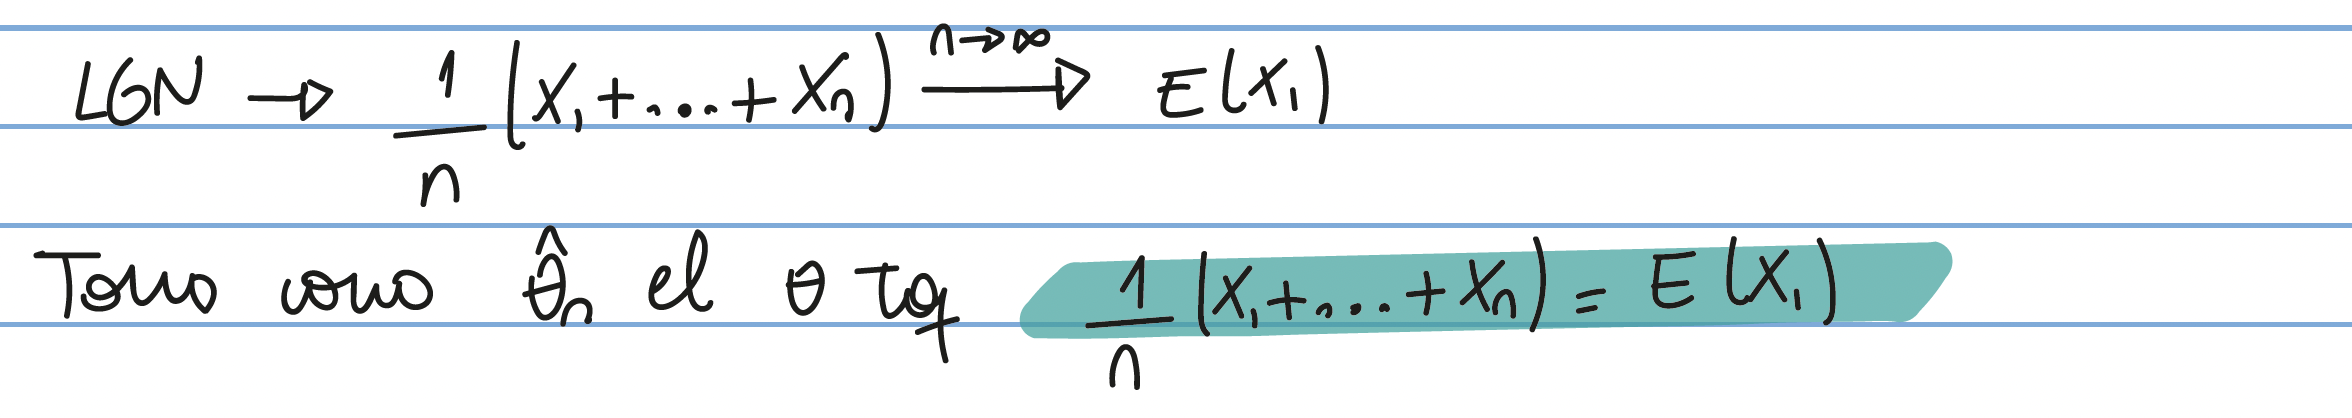

### Método de máxima verosimilitud

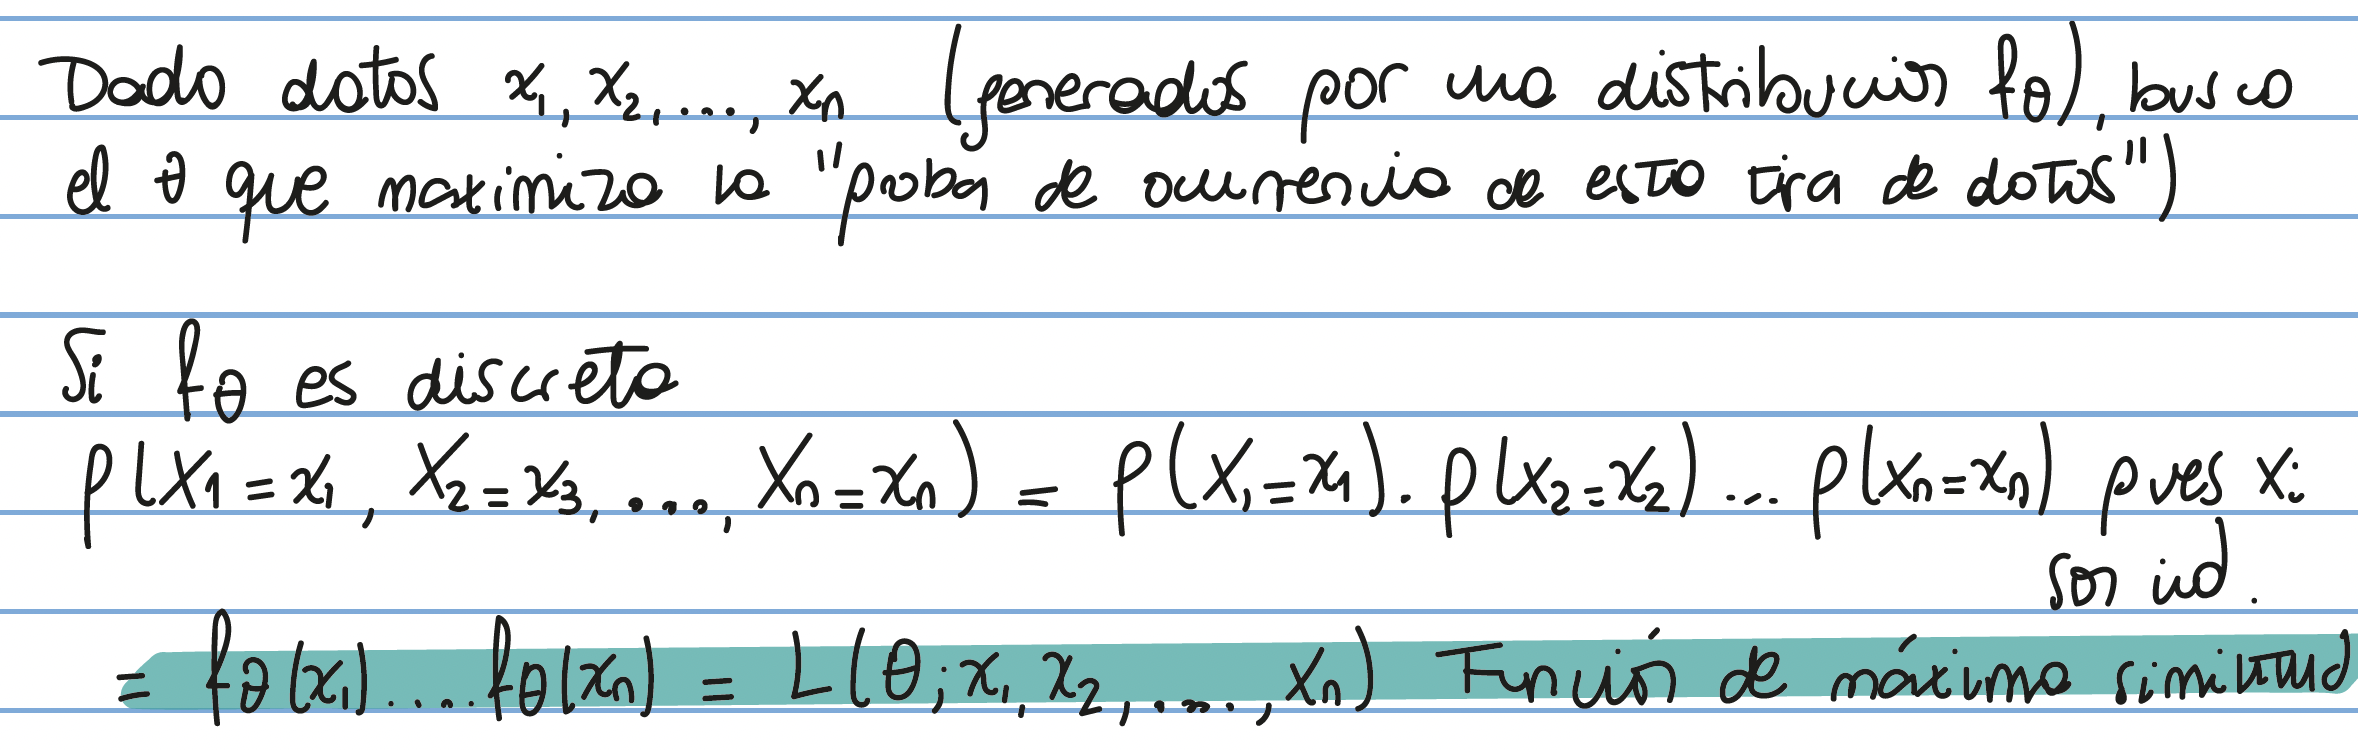

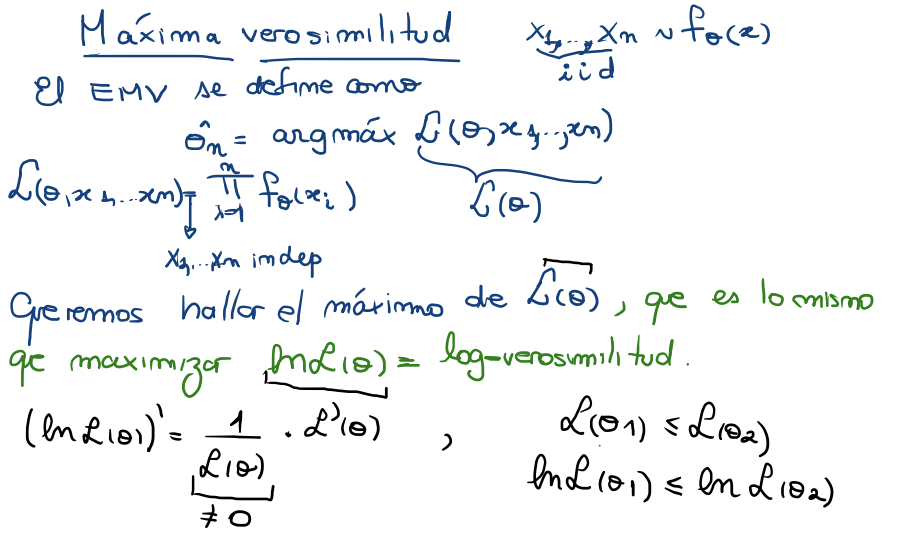


### Estimadores de distribuciones conocidas

| Distribucion           |  $Momentos$                     |        $\text{Max Ver}$             |
| -----------------------|---------------------------------|------------------------------------ |
| $U(0,\theta)$          |  $2\overline{X_n}$              | $max\{x_1,...,x_n\}$                |
| $Ber(\theta)$          |  $\overline{X_n}$               | $\overline{X_n}$                    |
| $Exp(\theta)$          |  $\frac{1}{\overline{X_n}}$     | $\frac{1}{\overline{X_n}}$          |
| $N(\mu,\sigma)$     |  $\overline{X_n}$     | $\hat{\mu}=\overline{X_n}$ $\hat{\sigma}=\sqrt{\frac{\sum{(X_i-\overline{X})^2}}{n}}$          |



En distribuciones $\Gamma(\alpha,\beta)$ y $U(-\theta,\theta)$ se tiene que usar el momento de orden dos para obtener el estimador de momentos: <a href="https://campus.exactas.uba.ar/pluginfile.php/304400/course/section/38573/PyECcompleta.pdf#page=163">Ver en libro Bianco</a>

### Propiedades de los estimadores

#### Insesgadez
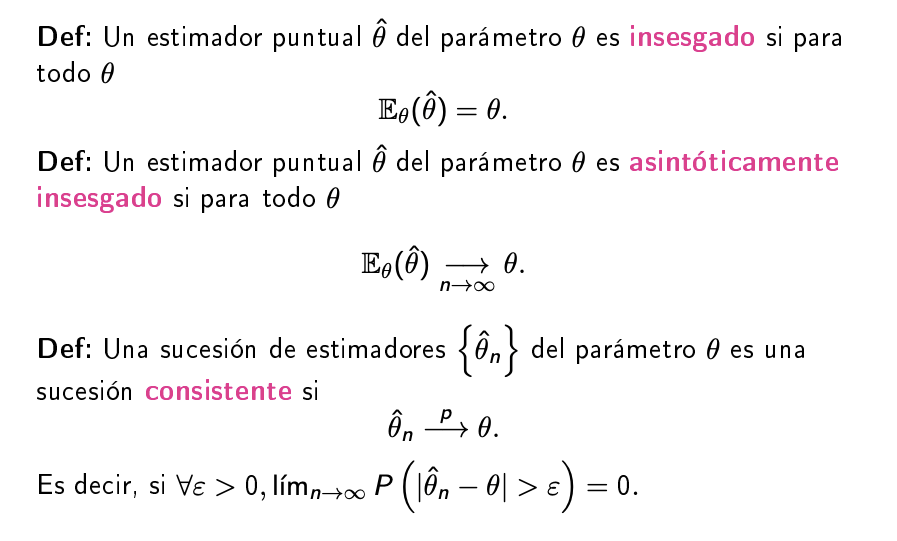

#### Consistencia
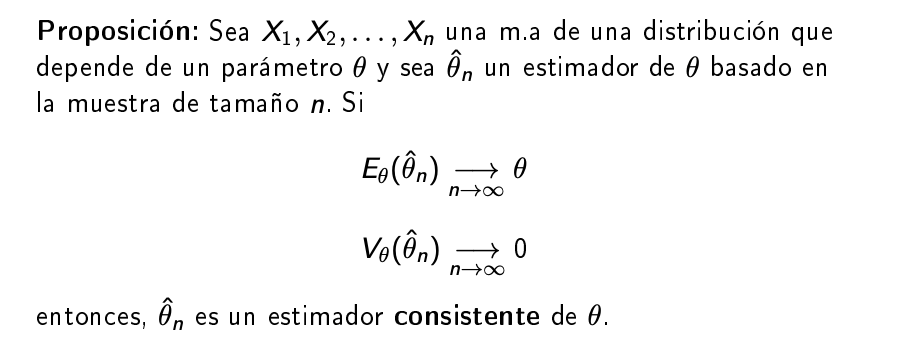

#### Error cuadrático medio
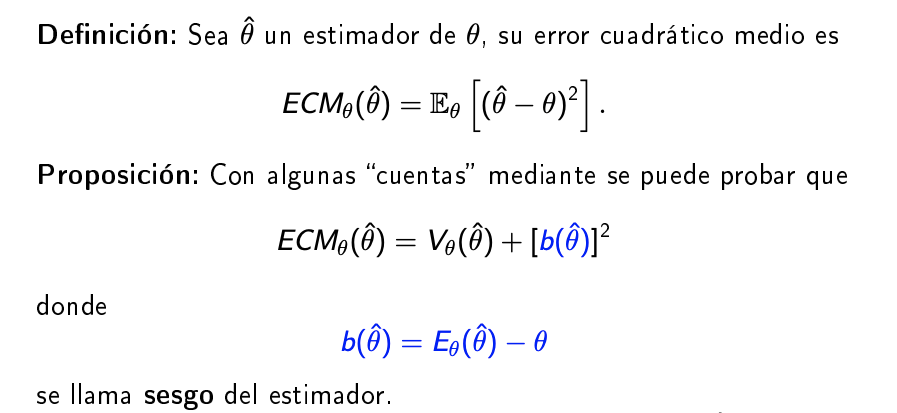

## Práctica 8 - Intervalos de confianza

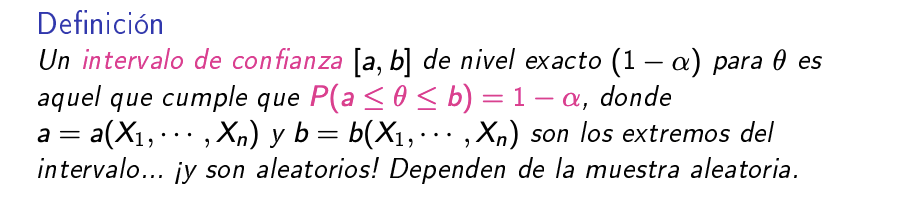

### Intervalos de confianza exactos

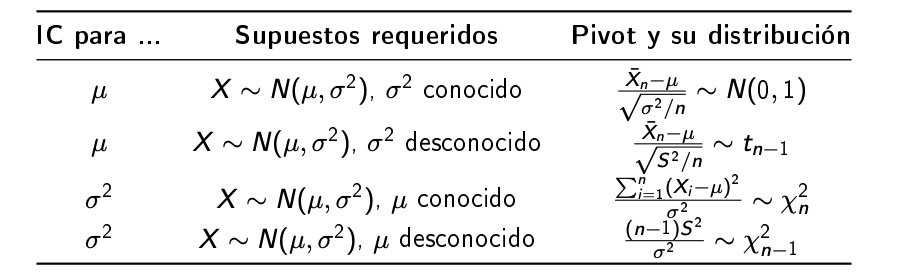

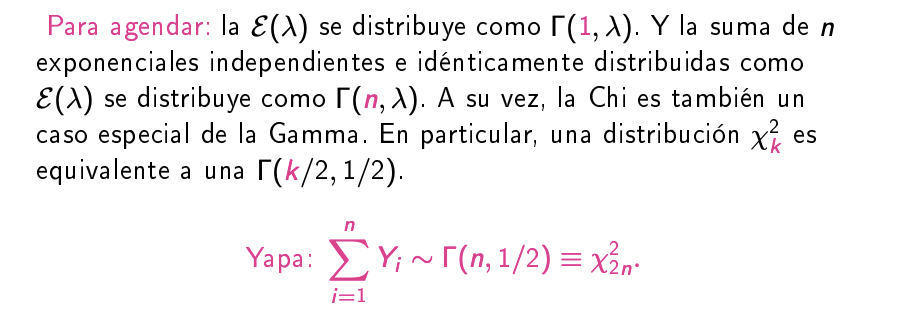

### Intervalos de confianza asintóticos

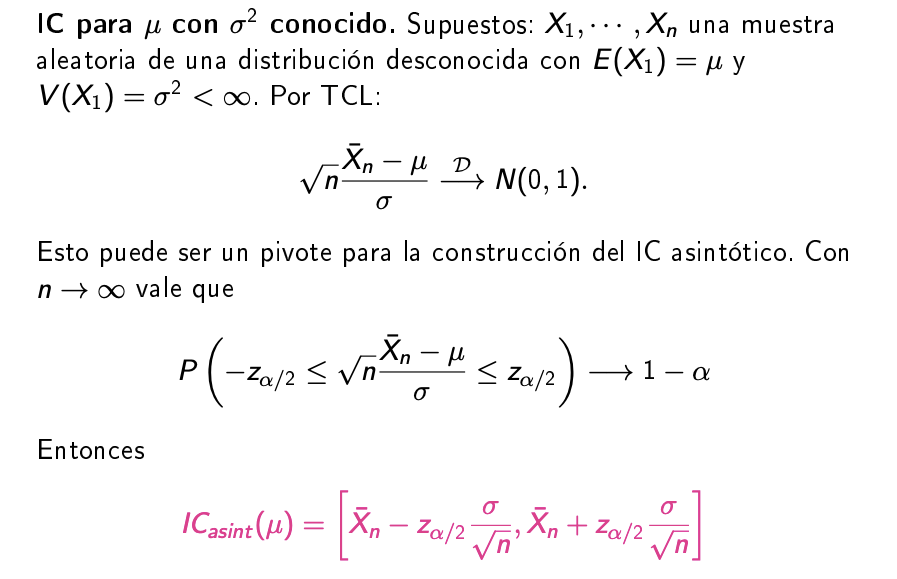

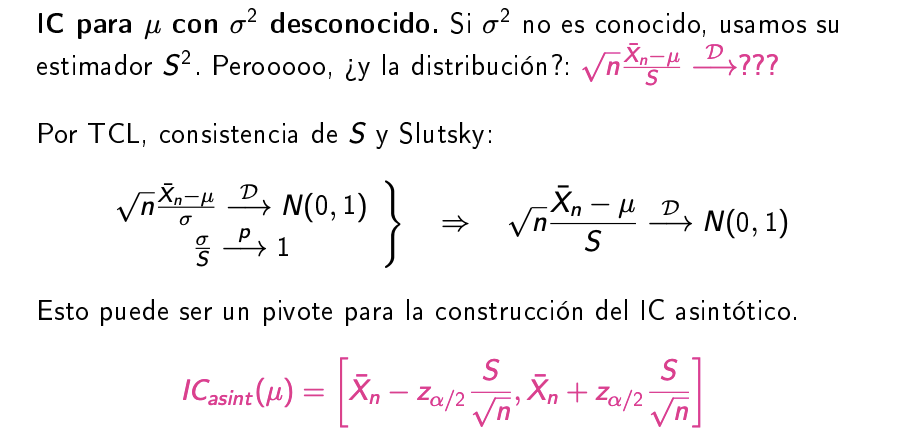

## Code Snippets

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [2]:
# Calculo de estimador MaxVer distribución normal
def MVnormal(datos, mu=None, sigma=None):
    m = np.mean(datos)
    s = np.var(datos)
    var = sum((x-m)**2 for x in datos)/len(datos)
    if mu == None and sigma == None:
        return (m, var)
    if sigma == None:
        return (mu,s)
    else:
        return (m,sigma)

In [3]:
# Estimaciones de parametro para una Geométrica
def tMomentosGeom(datos):
    xRaya = np.mean(datos)
    return 1/xRaya

def tMaxVerGeom(datos):
    xRaya = np.mean(datos)
    return 1/xRaya

In [4]:
# Intervalos de confianza para distribuciones normales
def getIntervaloParaMuConVar(alfa, var, mediaMuestral, n):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-(alfa/2))
    sd = math.sqrt(var)
    return (mediaMuestral - (z*sd/math.sqrt(n)),(mediaMuestral + (z*sd/math.sqrt(n))))

def getIntervaloParaMuSinVar(alfa, sdMuestral, mediaMuestral, n):
    va = scipy.stats.t(df=n-1)
    z = va.ppf(1-(alfa/2))
    sd = sdMuestral
    return (mediaMuestral - (z*sd/math.sqrt(n)),(mediaMuestral + (z*sd/math.sqrt(n))))

def getIntervaloParaVarConMu(alfa,muestra,mu,n):
    va = scipy.stats.chi2(df=n)
    xMin = va.ppf(1-a/2)
    xMax = va.ppf(a/2)
    sumatoria = sum([(m-mu)**2 for m in muestra])
    return (sumatoria/xMin, sumatoria/xMax)

def getIntervaloParaVarSinMu(alfa, desvioMuestral, n):
    va = scipy.stats.chi2(df=n-1)
    xMin = va.ppf(1-a/2)
    xMax = va.ppf(a/2)
    ter = (n-1)*(desvioMuestral**2)
    return (ter/xMin, ter/xMax)

In [5]:
# N necesarios para lograr "l" logitud del intervalo
def nParaLograrLongitudMuConVar(alfa, var, l):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-(alfa/2))
    sd = math.sqrt(var)
    return (2*z*sd/l)**2

def nParaLograrLongitudMuSinVar(alfa, var, n, l):
    va = scipy.stats.t(df=n-1)
    t = va.ppf(1-(alfa/2))
    sd = math.sqrt(var)
    return (2*t*sd/l)**2

In [6]:
# Intervalo para exponencial exacto
def getIntervaloParaExponencial(muestra, alfa, n):
    va = scipy.stats.chi2(df=2*n)
    xMin = va.ppf(a/2)
    xMax = va.ppf(1-(a/2))
    sumatoria = sum(muestra)
    return (xMin/(2*sumatoria),xMax/(2*sumatoria))

In [7]:
# Intervalo asitótico para exponencial. Devuelve E(X) luego hay que rescatar el parametro lambda
def getIntervaloExpoenencialAsintotico(alfa, sd, xRaya, n):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-(alfa/2))
    return (xRaya - z*sd/math.sqrt(n),xRaya + z*sd/math.sqrt(n))

In [8]:
# Intervalo para Binomial
def getIntervaloBinomial(a, mediaMuestral, n):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-a/2)
    correc = math.sqrt((mediaMuestral*(1-mediaMuestral))/n)
    return (mediaMuestral - z*correc,mediaMuestral + z*correc)

In [9]:
# N para lograr longitud "l" del intervalo binomial
def nParaIntervaloBinomial(alfa, lMax):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-(alfa/2))
    return (z/lMax)**2

In [10]:
# Intervalo para la Poisson
def getIntervaloPoisson(a, mediaMuestral, n):
    va = scipy.stats.norm(0,1)
    z = va.ppf(1-a/2)
    correc = math.sqrt((mediaMuestral/n))
    return (mediaMuestral - z*correc,mediaMuestral + z*correc)

## Resolución Entrega